# NearMiss

[Machine Learning with Imbalanced Data - Course](https://www.trainindata.com/p/machine-learning-with-imbalanced-data)

This procedures aims to select samples that are somewhat similar to the minority class, using 1 of three alternative procedures:

1) Select observations closer to the closest minority class

2) Select observations closer to the farthest minority class

3) Select observations furthest from their nearest neighbours

===

This procedure will select as many obserations from the majority class, as observations from the minority class are present in the dataset.

===

**Final Data size**: 2 x minority class

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import NearMiss

## Create data

We will create data where the classes have different degrees of separateness.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [2]:
def make_data(sep):
    
    # returns arrays
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           class_sep=sep,# how separate the classes are
                           random_state=1)
    
    # trasform arrays into pandas df and series
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)
    
    return X, y

## Undersample with NearMiss

[NearMiss](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html)

### Well separated classes

In [3]:
# create data

X, y = make_data(sep=2)

# set up Near Miss, first method
# that is, version = 1

nm1 = NearMiss(
    sampling_strategy='auto',  # undersamples only the majority class
    version=1,
    n_neighbors=3,
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = nm1.fit_resample(X, y)

In [4]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [5]:
# size of undersampled data
# majority class is undersampled till it matches the minority class

X_resampled.shape, y_resampled.shape

((34, 2), (34,))

In [6]:
y.value_counts()

0    983
1     17
Name: count, dtype: int64

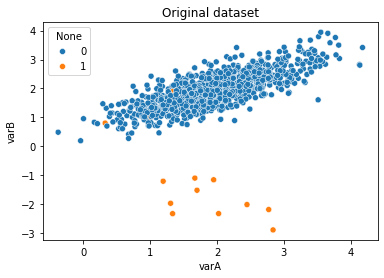

In [7]:
# plot original data

sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )

plt.title('Original dataset')
plt.show()

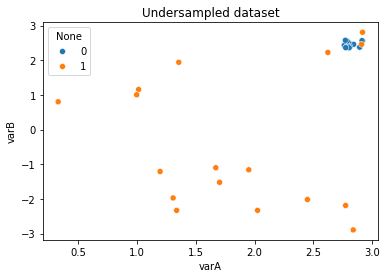

In [8]:
# plot undersampled data

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset')
plt.show()

Note how the observations closest to the minority class were retained in the dataset.

**Now let's try the second method**

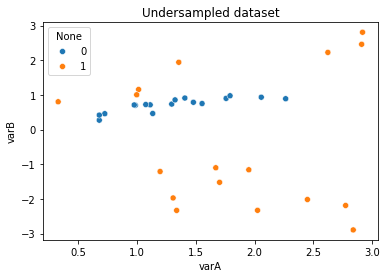

In [9]:
# version = 2

nm2 = NearMiss(
    sampling_strategy='auto',  # undersamples only the majority class
    version=2,
    n_neighbors=3,
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = nm2.fit_resample(X, y)

# plot undersampled data

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset')
plt.show()

The method retains those samples who are closest, to the furthest observations of the minority class.

In [10]:
# again majority class is undersampled till 
# the same number of minority observations

X_resampled.shape

(34, 2)

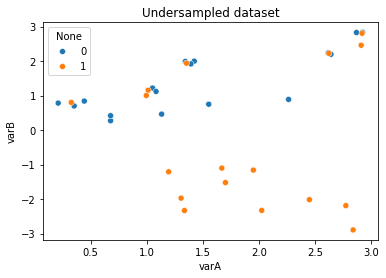

In [11]:
# version = 3

nm3 = NearMiss(
    sampling_strategy='auto',  # undersamples only the majority class
    version=3,
    n_neighbors=3,
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = nm3.fit_resample(X, y)

# plot undersampled data

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset')
plt.show()

### Partially separated classes

Let's repeat the same exercise in data where the classes are not so clearly separated. 

In [12]:
# create data
X, y = make_data(sep=0.1)

# set up edited nearest neighbour transformer

nm1 = NearMiss(
    sampling_strategy='auto',  # undersamples only the majority class
    version=1,
    n_neighbors=3,
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = nm1.fit_resample(X, y)

In [13]:
# original data

X.shape, y.shape

((1000, 2), (1000,))

In [14]:
# undersampled data

X_resampled.shape, y_resampled.shape

((34, 2), (34,))

As the classes are not so clearly distinguished, more samples were removed from the dataset.

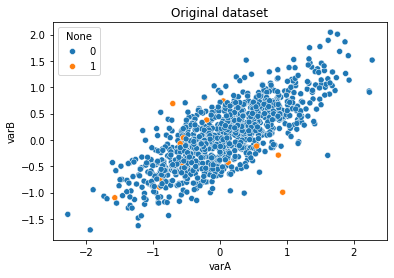

In [15]:
# plot original data

sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )

plt.title('Original dataset')
plt.show()

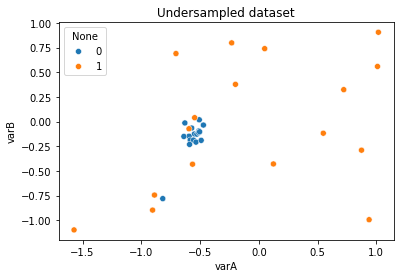

In [16]:
# plot undersampled data

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset') 
plt.show()

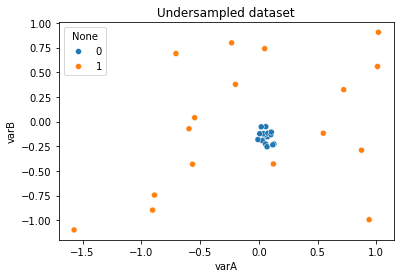

In [17]:
# version 2
nm2 = NearMiss(
    sampling_strategy='auto',  # undersamples only the majority class
    version=2,
    n_neighbors=3,
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = nm2.fit_resample(X, y)

# plot undersampled data

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset')
plt.show()

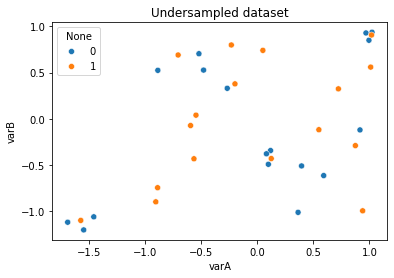

In [18]:
# version 3

nm3 = NearMiss(
    sampling_strategy='auto',  # undersamples only the majority class
    version=3,
    n_neighbors=3,
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = nm3.fit_resample(X, y)

# plot undersampled data

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset')
plt.show()

## NearMiss

### Real data - Performance comparison

Does it work well with real datasets? 

Well, it will depend on the dataset, so we need to try and compare the models built on the whole dataset, and that built on the undersampled dataset.

In [19]:
# load data
# only a few observations to speed the computaton

data = pd.read_csv('../kdd2004.csv').sample(10000)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
14527,31.45,33.33,0.84,39.0,-40.5,819.0,-1.37,-0.64,5.0,-57.5,...,611.4,-1.12,0.25,7.0,-60.0,-59.0,1.36,0.33,-0.27,-1
57830,53.17,29.17,-0.55,6.5,7.0,731.3,0.97,-0.29,1.0,-59.5,...,719.0,0.48,1.56,9.0,-57.0,350.2,-1.12,0.03,0.49,-1
143460,49.57,36.84,-0.25,-31.0,45.0,1582.9,-0.26,0.26,7.0,-67.0,...,1374.6,0.14,0.11,-5.0,-30.0,294.8,-0.21,0.22,-0.17,-1
22460,100.00,29.52,2.15,19.5,-20.5,912.3,0.59,1.61,10.5,-69.5,...,1777.6,-1.53,-0.13,5.0,-32.0,743.0,-1.38,0.22,-0.11,-1
108476,73.14,27.34,-0.54,-9.5,-14.5,2197.7,-1.98,-0.56,-5.5,-67.5,...,970.4,0.53,-0.02,5.0,-54.0,210.7,1.87,0.13,0.03,-1


In [20]:
# imbalanced target

data.target.value_counts() / len(data)

target
-1    0.9898
 1    0.0102
Name: count, dtype: float64

In [21]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

In [22]:
# NearMiss version 1

nm1 = NearMiss(
    sampling_strategy='auto',  # undersamples only the majority class
    version=1,
    n_neighbors=3,
    n_jobs=4)  # I have 4 cores in my laptop

X_nm1, y_nm1 = nm1.fit_resample(X_train, y_train)

In [23]:
# NearMiss version 2

nm2 = NearMiss(
    sampling_strategy='auto',  # undersamples only the majority class
    version=2,
    n_neighbors=3,
    n_jobs=4)  # I have 4 cores in my laptop

X_nm2, y_nm2 = nm2.fit_resample(X_train, y_train)

In [24]:
# NearMiss version 3

nm3 = NearMiss(
    sampling_strategy='auto',  # undersamples only the majority class
    version=3,
    n_neighbors=3,
    n_jobs=4)  # I have 4 cores in my laptop

X_nm3, y_nm3 = nm3.fit_resample(X_train, y_train)

In [25]:
# compare shapes

X_train.shape, X_nm1.shape, X_nm2.shape, X_nm3.shape

((7000, 74), (146, 74), (146, 74), (146, 74))

## Machine learning performance comparison

Let's compare model performance with and without undersampling.

In [26]:
# function to train random forests and evaluate the performance

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [27]:
# evaluate performance of algorithm built
# using imbalanced dataset

run_randomForests(X_train,
                  X_test,
                  y_train,
                  y_test)

Train set
Random Forests roc-auc: 0.9975161715819179
Test set
Random Forests roc-auc: 0.9540732831160994


In [28]:
# evaluate performance of algorithm built
# using enn undersampled dataset

run_randomForests(X_nm1,
                  X_test,
                  y_nm1,
                  y_test)

Train set
Random Forests roc-auc: 1.0
Test set
Random Forests roc-auc: 0.9013161712647548


In [29]:
# evaluate performance of algorithm built
# using renn undersampled dataset

run_randomForests(X_nm2,
                  X_test,
                  y_nm2,
                  y_test)

Train set
Random Forests roc-auc: 1.0
Test set
Random Forests roc-auc: 0.930465766780023


In [30]:
# evaluate performance of algorithm built
# using renn undersampled dataset

run_randomForests(X_nm3,
                  X_test,
                  y_nm3,
                  y_test)

Train set
Random Forests roc-auc: 1.0
Test set
Random Forests roc-auc: 0.9657377639016238


Performance does not improve in this case, utilising this undersampling procedure.

**HOMEWORK**

Try NearMiss in other datasets available in the package imbalanced-learn